# Pre-process

## Package & Datasets loading

In [1]:
import pandas as pd
import numpy as np
import re
import stanza
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/home/hao/Code/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('punkt')  
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/hao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/hao/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# stanza.download('en')
# nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment', tokenize_no_ssplit=True)

In [4]:
df = pd.read_csv('../../Final_Datasets/TA_combined_df_Outdoor_tourism_type_VADER_final.csv', encoding='latin1')
df

,Hotel_locID,Hotel_geoID_x,Review_id,Date_of_stay,Trip_type,Review_helpful_votes,Title,Review_Date,Reviewer_Contributions,Reviewer_helpful_vote,...,Hotel_rating,Location_score,Resaurant_count,Attractions_count,Hotel_styles,Popular_mentions,WordCount,Review,Compound_Score,Unreliable
0,23144733,34515,913352673,23-Aug,Traveled solo,0,"Decent for the Price, but Lacks Attention to D...",23-Aug,8,0,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",508,"I recently got to stay at the SPOT X Hotel, pa...",0.9967,0
1,23144733,34515,833765796,22-Feb,Traveled on business,2,Best Choice ???ÂÂ» Stay in Orlando,22-Apr,2,4,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",45,"The perfect stay for a smart coice. Brand New,...",0.9584,0
2,23144733,34515,906461005,23-Jul,Traveled as a couple,0,Gem of a hotel offering great value!,23-Jul,19,29,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",143,"Had a restful stay in 2023 from July 27-30, an...",0.9902,0
3,23144733,34515,898109791,23-Jun,Traveled on business,1,Excellent Stay!!,23-Jun,0,0,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",47,Everything about the hotel was great! Excellen...,0.9390,0
4,23144733,34515,891583554,22-Nov,Traveled on business,0,New for now,23-May,149,62,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",63,We did stay there for a week and the beds are ...,0.2363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,2290607,34515,417505916,16-Aug,Traveled with family,0,Worse hotel ever,16-Sep,0,2,...,1.5,NaN,NaN,NaN,['Budget'],[],209,I stayed the hotel because of the low price. B...,-0.9830,0
32288,2290607,34515,415134854,16-Sep,Traveled as a couple,0,WORST HOTEL I have EVER stayed at,16-Sep,0,2,...,1.5,NaN,NaN,NaN,['Budget'],[],130,I promise you I will NEVER ever use this hotel...,0.6428,0
32289,2290607,34515,413963936,16-Sep,Traveled with family,0,Will NEVER STAY here again,16-Sep,13,2,...,1.5,NaN,NaN,NaN,['Budget'],[],49,First off roaches in the room live and dead. T...,-0.9001,0
32290,2290607,34515,395650617,16-Jul,NaN,0,Not horrible but far from doable for more than...,16-Jul,0,0,...,1.5,NaN,NaN,NaN,['Budget'],[],145,Walking in it took forever to get checked in. ...,0.8705,0


In [5]:
df['Hotel_star'].unique()

array([3. , 4. , 3.5, 2. , 2.5, 5. , nan, 4.5])

## Data Overview & Labeling

In [6]:
# VADER
def calculate_compound_score(review):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(review)['compound']

# Unreliable tag
def calculate_unreliable(row):
    compound_score = row['Compound_Score']
    rating = row['Review_Rating']
    
    if (compound_score < -0.49 and rating >= 3):
        return 1
    else:
        return 0

In [7]:
# df['Compound_Score'] = df['Review'].apply(calculate_compound_score)

In [8]:
# df['Unreliable'] = df.apply(calculate_unreliable, axis=1)
print(df['Unreliable'].value_counts())

Unreliable
0    31714
1      578
Name: count, dtype: int64


In [9]:
# df['Stanza_Score'] = df['Review'].apply(analyze_sentiment)

In [10]:
# Unreliable reviews example
unreliable_reviews = df[df['Unreliable'] == 1]['Review']
unreliable_reviews.head(10)

51     Always great but hotel was embarrassed this ti...
65     The Hyatt Regency is supposed to be the luxury...
100    Senior Hyatt Regency Management needs to take ...
111    We stayed @ Hyatt Grand Cypress resort from Mo...
114    The room was a decent size with a big TV. The ...
121    Used / Dirty cups were spread out across the h...
129    Charged $30 for package had shipped to us Dail...
332    Excellent service from the receptionist Talli....
344    The hottub was broken, overcharged by adding 2...
360    The food for my large group was not the greate...
Name: Review, dtype: object

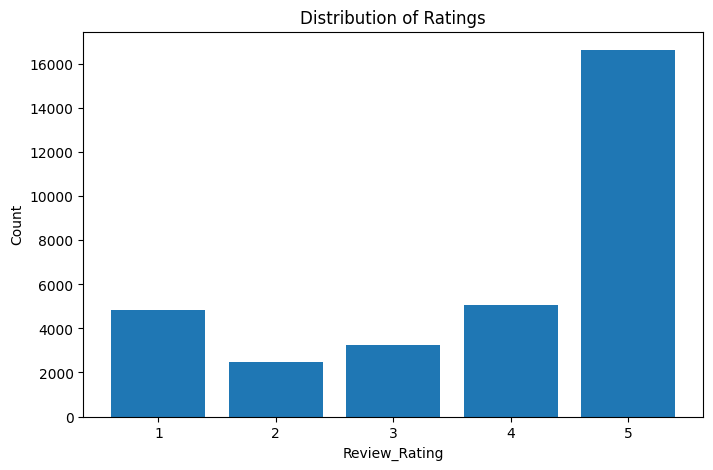

In [11]:
# Reviews rating distributions
rating_counts = df['Review_Rating'].value_counts()
rating_counts = rating_counts.sort_index()
plt.figure(figsize=(8, 5))  # size
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Review_Rating')  
plt.ylabel('Count')  
plt.title('Distribution of Ratings')  
plt.show()

## Function

In [12]:
def decontracting(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'bout", "about", text)
    text = re.sub(r"\'til", "until", text)
    return text

stopwords_list = stopwords.words('english')
def remove_stopwords(tokens):
    texts = [i for i in tokens if i not in stopwords_list]
    return texts


def lemmatization(tokens):
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return lemmatized_tokens


def word_preprocess(df, column_name):
  #lowercase
  df[column_name] = df[column_name].apply(lambda x: str(x).lower())

  #decontracting
  df[column_name] = df[column_name].apply(decontracting)

  #remove tags, punctuations, numbers
  df[column_name] = df[column_name].apply(lambda x: re.sub('[^a-zA-Z!]', ' ', x))

  #tokenization
  import nltk
  nltk.download('punkt')
  df[column_name] = df[column_name].apply(lambda x: nltk.word_tokenize(x))

  #remove stopwords
  df[column_name] = df[column_name].apply(remove_stopwords)
  return df

## Text Preprocess

In [13]:
text_preprocessed_df = word_preprocess(df,'Review')

[nltk_data] Downloading package punkt to /home/hao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
text_preprocessed_df['Review']

0        [recently, got, stay, spot, x, hotel, part, re...
1        [perfect, stay, smart, coice, brand, new, exce...
2        [restful, stay, july, wonderful, experience, s...
3        [everything, hotel, great, !, excellent, rooms...
4        [stay, week, beds, comfortable, clean, room, l...
                               ...                        
32287    [stayed, hotel, low, price, take, long, realiz...
32288    [promise, never, ever, use, hotel, first, take...
32289    [first, roaches, room, live, dead, mold, bathr...
32290    [walking, took, forever, get, checked, sure, k...
32291    [although, price, reasonable, including, tax, ...
Name: Review, Length: 32292, dtype: object

In [15]:
# delete nan row
text_preprocessed_df = text_preprocessed_df.dropna(subset=['Hotel_star', 'Review_Rating', 'Review', 'Reviewer_Contributions'])

In [16]:
text_preprocessed_df['Hotel_star'].unique()

array([3. , 4. , 3.5, 2. , 2.5, 5. , 4.5])

In [17]:
text_preprocessed_df['Review_Rating'].mean()

3.8147882268485285

In [18]:
# 用於描述性統計
rating_counts = text_preprocessed_df['Review_Rating'].value_counts()
rating_proportions = text_preprocessed_df['Review_Rating'].value_counts(normalize=True)

# 打印計數和比例
print("Rating counts:\n", rating_counts)
print("Rating proportions:\n", rating_proportions)

Rating counts:
 Review_Rating
5    15804
4     4850
1     4566
3     3070
2     2356
Name: count, dtype: int64
Rating proportions:
 Review_Rating
5    0.515695
4    0.158259
1    0.148992
3    0.100176
2    0.076878
Name: proportion, dtype: float64


## Split datasets to sub-datasets

In [19]:
text_preprocessed_df

,Hotel_locID,Hotel_geoID_x,Review_id,Date_of_stay,Trip_type,Review_helpful_votes,Title,Review_Date,Reviewer_Contributions,Reviewer_helpful_vote,...,Hotel_rating,Location_score,Resaurant_count,Attractions_count,Hotel_styles,Popular_mentions,WordCount,Review,Compound_Score,Unreliable
0,23144733,34515,913352673,23-Aug,Traveled solo,0,"Decent for the Price, but Lacks Attention to D...",23-Aug,8,0,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",508,"[recently, got, stay, spot, x, hotel, part, re...",0.9967,0
1,23144733,34515,833765796,22-Feb,Traveled on business,2,Best Choice ???ÂÂ» Stay in Orlando,22-Apr,2,4,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",45,"[perfect, stay, smart, coice, brand, new, exce...",0.9584,0
2,23144733,34515,906461005,23-Jul,Traveled as a couple,0,Gem of a hotel offering great value!,23-Jul,19,29,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",143,"[restful, stay, july, wonderful, experience, s...",0.9902,0
3,23144733,34515,898109791,23-Jun,Traveled on business,1,Excellent Stay!!,23-Jun,0,0,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",47,"[everything, hotel, great, !, excellent, rooms...",0.9390,0
4,23144733,34515,891583554,22-Nov,Traveled on business,0,New for now,23-May,149,62,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",63,"[stay, week, beds, comfortable, clean, room, l...",0.2363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,2290607,34515,417505916,16-Aug,Traveled with family,0,Worse hotel ever,16-Sep,0,2,...,1.5,NaN,NaN,NaN,['Budget'],[],209,"[stayed, hotel, low, price, take, long, realiz...",-0.9830,0
32288,2290607,34515,415134854,16-Sep,Traveled as a couple,0,WORST HOTEL I have EVER stayed at,16-Sep,0,2,...,1.5,NaN,NaN,NaN,['Budget'],[],130,"[promise, never, ever, use, hotel, first, take...",0.6428,0
32289,2290607,34515,413963936,16-Sep,Traveled with family,0,Will NEVER STAY here again,16-Sep,13,2,...,1.5,NaN,NaN,NaN,['Budget'],[],49,"[first, roaches, room, live, dead, mold, bathr...",-0.9001,0
32290,2290607,34515,395650617,16-Jul,NaN,0,Not horrible but far from doable for more than...,16-Jul,0,0,...,1.5,NaN,NaN,NaN,['Budget'],[],145,"[walking, took, forever, get, checked, sure, k...",0.8705,0


In [20]:
# if interaction exists
def contributions_range(value):
    if value <= 5:
        return 1
    else:
        return 2
    
def hotel_star_range(value):
    if value <= 2.0:
        return 1
    elif value >= 2.5 and value <= 3.0:
        return 1
    elif value >= 3.5 and value <= 4.0:
        return 2
    else:
        return 2

In [21]:
# create new columns
# text_preprocessed_df['Reviewer_Contributions_range'] = text_preprocessed_df['Reviewer_Contributions'].apply(contributions_range)
# text_preprocessed_df['Hotel_star_range'] = text_preprocessed_df['Hotel_star'].apply(hotel_star_range)
text_preprocessed_df

,Hotel_locID,Hotel_geoID_x,Review_id,Date_of_stay,Trip_type,Review_helpful_votes,Title,Review_Date,Reviewer_Contributions,Reviewer_helpful_vote,...,Hotel_rating,Location_score,Resaurant_count,Attractions_count,Hotel_styles,Popular_mentions,WordCount,Review,Compound_Score,Unreliable
0,23144733,34515,913352673,23-Aug,Traveled solo,0,"Decent for the Price, but Lacks Attention to D...",23-Aug,8,0,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",508,"[recently, got, stay, spot, x, hotel, part, re...",0.9967,0
1,23144733,34515,833765796,22-Feb,Traveled on business,2,Best Choice ???ÂÂ» Stay in Orlando,22-Apr,2,4,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",45,"[perfect, stay, smart, coice, brand, new, exce...",0.9584,0
2,23144733,34515,906461005,23-Jul,Traveled as a couple,0,Gem of a hotel offering great value!,23-Jul,19,29,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",143,"[restful, stay, july, wonderful, experience, s...",0.9902,0
3,23144733,34515,898109791,23-Jun,Traveled on business,1,Excellent Stay!!,23-Jun,0,0,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",47,"[everything, hotel, great, !, excellent, rooms...",0.9390,0
4,23144733,34515,891583554,22-Nov,Traveled on business,0,New for now,23-May,149,62,...,4.5,67.0,52.0,4.0,[],"['outlet mall', 'excellent cost benefit', 'exc...",63,"[stay, week, beds, comfortable, clean, room, l...",0.2363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,2290607,34515,417505916,16-Aug,Traveled with family,0,Worse hotel ever,16-Sep,0,2,...,1.5,NaN,NaN,NaN,['Budget'],[],209,"[stayed, hotel, low, price, take, long, realiz...",-0.9830,0
32288,2290607,34515,415134854,16-Sep,Traveled as a couple,0,WORST HOTEL I have EVER stayed at,16-Sep,0,2,...,1.5,NaN,NaN,NaN,['Budget'],[],130,"[promise, never, ever, use, hotel, first, take...",0.6428,0
32289,2290607,34515,413963936,16-Sep,Traveled with family,0,Will NEVER STAY here again,16-Sep,13,2,...,1.5,NaN,NaN,NaN,['Budget'],[],49,"[first, roaches, room, live, dead, mold, bathr...",-0.9001,0
32290,2290607,34515,395650617,16-Jul,NaN,0,Not horrible but far from doable for more than...,16-Jul,0,0,...,1.5,NaN,NaN,NaN,['Budget'],[],145,"[walking, took, forever, get, checked, sure, k...",0.8705,0


In [22]:
# Split 4 sub-datasets
# LCLS = text_preprocessed_df[(text_preprocessed_df['Reviewer_Contributions_range'] == 1) & (text_preprocessed_df['Hotel_star_range'] == 1)]
# LCHS = text_preprocessed_df[(text_preprocessed_df['Reviewer_Contributions_range'] == 1) & (text_preprocessed_df['Hotel_star_range'] == 2)]
# HCLS = text_preprocessed_df[(text_preprocessed_df['Reviewer_Contributions_range'] == 2) & (text_preprocessed_df['Hotel_star_range'] == 1)]
# HCHS = text_preprocessed_df[(text_preprocessed_df['Reviewer_Contributions_range'] == 2) & (text_preprocessed_df['Hotel_star_range'] == 2)]


In [23]:
# split unreliable reviews
Outdoor_unreliable = text_preprocessed_df[text_preprocessed_df['Unreliable'] == 1]
# LCLS_unreliable = LCLS[LCLS['Unreliable'] == 1]
# LCHS_unreliable = LCHS[LCHS['Unreliable'] == 1]
# HCLS_unreliable = HCLS[HCLS['Unreliable'] == 1]
# HCHS_unreliable = HCHS[HCHS['Unreliable'] == 1]

In [24]:
# split reliable reviews
Outdoor_reliable = text_preprocessed_df[text_preprocessed_df['Unreliable'] == 0]
# LCLS_reliable = LCLS[LCLS['Unreliable'] == 0]
# LCHS_reliable = LCHS[LCHS['Unreliable'] == 0]
# HCLS_reliable = HCLS[HCLS['Unreliable'] == 0]
# HCHS_reliable = HCHS[HCHS['Unreliable'] == 0]

In [25]:
# split subset
selected_columns = ['Review', 'Review_Rating']
Outdoor_reliable_text = Outdoor_reliable.loc[:, selected_columns]

Outdoor_reliable_text.reset_index(drop=True, inplace=True)

Outdoor_reliable_text['Review'] = [' '.join(text) for text in Outdoor_reliable_text['Review']]
# LCLS_text = LCLS_reliable.loc[:, selected_columns]
# LCHS_text = LCHS_reliable.loc[:, selected_columns]
# HCLS_text = HCLS_reliable.loc[:, selected_columns]
# HCHS_text = HCHS_reliable.loc[:, selected_columns]

# # reset index
# LCLS_text.reset_index(drop=True, inplace=True)
# LCHS_text.reset_index(drop=True, inplace=True)
# HCLS_text.reset_index(drop=True, inplace=True)
# HCHS_text.reset_index(drop=True, inplace=True)

# Split sub-datasets to X & Y, Training and Testing set

In [26]:
# LCLS_X = LCLS_text['Review']
# LCLS_y = LCLS_text['Review_Rating']

# LCHS_X = LCHS_text['Review']
# LCHS_y = LCHS_text['Review_Rating']

# HCLS_X = HCLS_text['Review']
# HCLS_y = HCLS_text['Review_Rating']

# HCHS_X = HCHS_text['Review']
# HCHS_y = HCHS_text['Review_Rating']

Outdoor_X = Outdoor_reliable_text['Review']
Outdoor_y = Outdoor_reliable_text['Review_Rating']

Outdoor_X_train, Outdoor_X_test, Outdoor_y_train, Outdoor_y_test = train_test_split(Outdoor_X, Outdoor_y, test_size=0.2, random_state=88)
# LCLS_X_train, LCLS_X_test, LCLS_y_train, LCLS_y_test = train_test_split(LCLS_X, LCLS_y, test_size=0.2, random_state=88)
# LCHS_X_train, LCHS_X_test, LCHS_y_train, LCHS_y_test = train_test_split(LCHS_X, LCHS_y, test_size=0.2, random_state=88)
# HCLS_X_train, HCLS_X_test, HCLS_y_train, HCLS_y_test = train_test_split(HCLS_X, HCLS_y, test_size=0.2, random_state=88)
# HCHS_X_train, HCHS_X_test, HCHS_y_train, HCHS_y_test = train_test_split(HCHS_X, HCHS_y, test_size=0.2, random_state=88)

In [27]:
Outdoor_X_train

8997     absolute home home florida hotel even microwav...
12421    hotel clean kids enjoyed pool gym bar amazing ...
2511     one worst hotel stayed ever mean hear wi fi pa...
21441    best place stay orlando florida place extra cl...
6496     able find many reviews prior trip wanted share...
                               ...                        
24938    worst hotel ever took daughter due volleyball ...
2481     service great ! grounds large front desk gentl...
4047     first time staying came back service provided ...
6432     family super hard day came sheraton covid pcr ...
26584    stay worst hotel ever caries wyndham name dirt...
Name: Review, Length: 24075, dtype: object

In [28]:
Outdoor_y_train

8997     5
12421    5
2511     2
21441    5
6496     4
        ..
24938    1
2481     4
4047     5
6432     5
26584    1
Name: Review_Rating, Length: 24075, dtype: int64

In [29]:
Outdoor_X_test

29093    stayed hotel year old son mixed business mini ...
14732    rooms great spacious pool area always clean fu...
27345    held business training one meeting spaces cour...
28049    first say booked dvc property cash stay joined...
15621    great staff room needs refreshing drapes close...
                               ...                        
16494    night stay check process took long time booked...
15829    breakfast vending machines laundry machines ic...
19355    worked golf tournament bay hill days long tiri...
18896    room completely clean found cockroaches dusty ...
17314    would given stars could attraction park sad fr...
Name: Review, Length: 6019, dtype: object

In [30]:
Outdoor_y_test

29093    5
14732    5
27345    5
28049    5
15621    4
        ..
16494    3
15829    1
19355    5
18896    1
17314    1
Name: Review_Rating, Length: 6019, dtype: int64

# Feature extraction

## BOW

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

def generate_bow_train(X_train, max_features=1000):
    vectorizer = CountVectorizer(max_features=max_features)
    bow_vectors = vectorizer.fit_transform(X_train)
    bow_df = pd.DataFrame(bow_vectors.toarray(), columns=vectorizer.get_feature_names_out())
    
    return bow_df, vectorizer

def generate_bow_test(X_test, vectorizer):
    bow_vectors = vectorizer.transform(X_test)
    bow_df = pd.DataFrame(bow_vectors.toarray(), columns=vectorizer.get_feature_names_out())
    
    return bow_df

In [32]:
Outdoor_X_train_bow_df, Outdoor_vectorizer = generate_bow_train(Outdoor_X_train)

### Testing set

In [33]:
Outdoor_X_test_bow_df = generate_bow_test(Outdoor_X_test, Outdoor_vectorizer)

## TF-IDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

def generate_tfidf_train(X_train, stop_words='english', max_features=1000, max_df=0.9):
    tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=max_features, max_df=max_df)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    tfidf_df = pd.DataFrame(X_train_tfidf, columns=feature_names)
    
    return tfidf_df, tfidf_vectorizer

def generate_tfidf_test(X_test, tfidf_vectorizer):
    X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    tfidf_df = pd.DataFrame(X_test_tfidf, columns=feature_names)
    
    return tfidf_df

In [35]:
Outdoor_X_train_tfidf_df, tfidf_vectorizer_Outdoor = generate_tfidf_train(Outdoor_X_train)

### Testing set

In [36]:
Outdoor_X_test_tfidf_df = generate_tfidf_test(Outdoor_X_test, tfidf_vectorizer_Outdoor)

## Doc2Vec

In [37]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

def train_doc2vec_model(X_train, min_count=5, workers=8, epochs=40, vector_size=100):
    tagged_docs = [TaggedDocument(doc.split(' '), [i]) for i, doc in enumerate(X_train)]
    model = Doc2Vec(min_count=min_count, workers=workers, epochs=epochs, vector_size=vector_size)
    model.build_vocab(tagged_docs)
    model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)
    
    return model

In [38]:
D2V_model = train_doc2vec_model(Outdoor_X_train)

In [39]:
Outdoor_X_train_d2v = pd.DataFrame(np.array([D2V_model.infer_vector((doc.split(' '))) for doc in Outdoor_X_train]))

In [40]:
Outdoor_X_train_d2v

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.774833,-0.143001,-0.892874,-0.233048,0.653453,-0.668397,0.012768,-0.169828,0.072204,-0.359969,...,0.318764,-0.079619,-0.119047,0.314340,0.372970,0.008912,-0.506409,0.165405,-0.929570,-0.180259
1,-1.169286,0.011649,-0.286137,-0.053463,-0.377443,-0.923604,-0.005215,1.229463,-0.736206,-0.551008,...,-0.085528,0.227806,-0.610951,-0.139019,-1.029508,1.005347,0.009634,0.283024,-0.038161,0.092901
2,-0.106345,-0.213564,-1.268841,-0.152352,0.521268,-0.502670,0.730943,-1.525511,-2.022004,0.142890,...,0.310705,-0.586734,0.685515,1.430984,0.140491,-0.024617,-0.817919,-0.408232,-0.738587,-0.157084
3,-1.797326,0.515016,-0.727590,0.918477,0.348959,-0.736819,-0.551690,-0.149062,-1.718782,-1.267354,...,-1.057470,0.197350,0.379467,-0.219875,0.399387,-0.329094,0.139156,-0.335063,-0.282928,-0.622677
4,-0.926168,-0.428331,-0.097422,1.633352,-0.644155,0.447637,-0.453105,-1.826963,-0.652638,-1.184929,...,1.730912,1.649688,1.788185,0.885802,1.079745,0.866907,2.121641,-0.460191,-0.730750,1.892881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24070,0.481946,0.454467,-0.259467,0.942835,0.053195,-0.108638,0.494477,0.153143,-0.666396,-0.230788,...,-1.086304,-0.278006,0.295645,-0.465999,0.677841,-0.598442,-0.628338,-1.091451,0.715241,-0.426479
24071,-0.636638,-0.300922,0.111902,0.170197,-0.055298,0.100870,0.803125,0.623899,-0.639687,-0.587034,...,0.204110,0.755421,0.111540,-0.645747,0.140160,0.309067,0.438182,-0.315385,0.508518,-0.041458
24072,-1.171554,-0.921848,-0.820316,0.115672,0.794387,-1.060208,-0.198911,0.651164,-0.500871,-0.934945,...,0.725993,0.040019,-0.015844,0.535494,-0.463717,-0.714822,-0.310968,0.938007,0.636888,-0.267429
24073,-0.202422,0.289605,-0.057572,-0.110857,-0.028276,-0.435836,-0.003955,1.208357,-0.950352,0.024835,...,0.583582,-0.226097,0.142387,-1.697186,-0.441318,-0.159669,-2.084000,-0.386158,-2.012048,-0.141233


### Testing set

In [41]:
Outdoor_X_test_d2v = pd.DataFrame(np.array([D2V_model.infer_vector((doc.split(' '))) for doc in Outdoor_X_test]))

## GloVe

In [42]:
glove_path = '../../GloVe_wordvec/glove.6B.100d.txt'

# import GloVe word vectors into dictionary
embeddings_index = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [43]:
# define function to create embedding matrix
def glove_embedding(comment, embeddings_index = embeddings_index, dim=100):
    words = comment.split()
    vec = np.zeros(dim)
    count = 0
    for word in words:
        embedding_vector = embeddings_index.get(word) # get GloVe word vectors
        if embedding_vector is not None:
            vec += embedding_vector
            count += 1
    if count != 0:
        vec /= count
    return vec

In [44]:
Outdoor_X_train_glove = pd.DataFrame(np.array([glove_embedding(comment) for comment in Outdoor_X_train]))

In [45]:
Outdoor_X_train_glove

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.001987,0.233635,0.430726,-0.356195,-0.240488,0.332360,0.049685,0.252141,0.014591,-0.021626,...,0.170154,-0.097273,0.118134,0.099495,-0.573068,0.016141,-0.098072,-0.174082,0.488518,0.263079
1,0.060790,0.187020,0.243104,-0.165561,-0.124957,0.134420,-0.086875,0.561494,-0.233715,-0.018706,...,0.107866,-0.122068,0.253637,-0.071931,-0.596894,0.089571,-0.246285,-0.157705,0.452043,0.179871
2,-0.034770,0.248121,0.330794,-0.204502,-0.127864,0.306917,-0.136960,0.292214,-0.007233,-0.123031,...,0.092045,-0.099344,0.225505,-0.140386,-0.411669,0.076435,-0.094175,-0.079918,0.423178,0.131202
3,-0.010523,0.202525,0.343270,-0.080774,0.011234,0.061599,-0.003004,0.153365,-0.152003,-0.122573,...,-0.014472,-0.054335,0.098424,-0.185599,-0.390590,0.091024,-0.096778,-0.085739,0.267129,0.190479
4,-0.082540,0.202572,0.157080,0.075078,-0.045980,0.370636,-0.052210,0.400990,-0.075156,0.022261,...,0.060270,-0.238311,0.279981,-0.149263,-0.369926,0.056957,-0.082832,-0.129802,0.610468,0.066063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24070,0.097162,0.136113,0.303871,-0.158388,-0.129692,0.250260,-0.076399,0.311117,-0.033105,-0.121727,...,0.030026,-0.126546,0.029301,-0.012669,-0.421316,0.067971,-0.143759,0.013924,0.398897,0.100250
24071,-0.109093,0.192889,0.235313,-0.333612,-0.093659,0.246799,0.040152,0.143069,-0.015179,-0.112485,...,0.146336,-0.086903,0.139536,0.084781,-0.483748,-0.071064,-0.202578,-0.131936,0.422437,0.399555
24072,-0.021392,0.180661,0.270321,-0.075594,-0.084365,0.065231,-0.175848,0.178269,-0.011167,-0.103454,...,-0.042484,-0.048000,-0.014793,-0.151392,-0.445246,-0.012530,0.067934,-0.024743,0.303343,0.167260
24073,0.008169,0.134537,0.405518,-0.243083,-0.252662,0.173529,-0.036085,0.377412,-0.250863,-0.107711,...,0.052560,-0.039903,0.148470,-0.100287,-0.503458,0.025204,-0.037735,-0.056240,0.369959,0.183662


In [46]:
# test
Outdoor_X_test_glove = pd.DataFrame(np.array([glove_embedding(comment) for comment in Outdoor_X_test]))

## BERT

In [47]:
import transformers
import torch

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [49]:
# BERT(longformer) model
model_name = 'allenai/longformer-base-4096'
tokenizer = transformers.LongformerTokenizer.from_pretrained(model_name)
model = transformers.LongformerModel.from_pretrained(model_name).to(device)

In [50]:
# define function
def bert_embedding(X_train):
    embeddings = []
    for text in X_train:
        # 將文本轉成BERT的輸入格式，即加上[CLS]與[SEP] token，並轉成tensor
        encoded_text = tokenizer.encode_plus(text, add_special_tokens=True, return_tensors='pt').to(device)

        # 用預訓練BERT模型轉成向量
        with torch.no_grad():
            model_output = model(encoded_text['input_ids'], attention_mask=encoded_text['attention_mask'])

        # 取出[CLS] token對應的向量作為整個文本的向量表示
        embeddings.append(model_output.last_hidden_state[:, 0, :].squeeze().tolist())
    return embeddings

In [51]:
Outdoor_X_train_bert = pd.DataFrame(bert_embedding(Outdoor_X_train))

### Testing set

In [52]:
Outdoor_X_test_bert = pd.DataFrame(bert_embedding(Outdoor_X_test))

# Model

## Package loading & function define

In [53]:
# ML
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# DL
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, Input
from keras.callbacks import EarlyStopping
from keras.layers import LSTM

# evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

import warnings

2024-05-22 11:38:01.548215: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 11:38:01.548239: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 11:38:01.548257: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-22 11:38:01.552056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 11:38:02.403678: W tensorflow/compiler/

In [54]:
# define validation function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def validation(model_name, X_train, y_train, word_vec_train):
    cv = 10
    
    # MSE
    mse_scores = cross_val_score(model_name, X_train, y_train, cv=cv, scoring='neg_mean_squared_error') # mse
    mse_scores = -mse_scores # transfer to positive
    avg_mse = mse_scores.mean()
    
    # MAE
    mae_scores = cross_val_score(model_name, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores  # Convert to positive values
    avg_mae = mae_scores.mean()
    
    # MAPE
    mape_scorer = make_scorer(mape, greater_is_better=False)  # Create custom scorer
    mape_scores = cross_val_score(model_name, X_train, y_train, cv=cv, scoring=mape_scorer)
    mape_scores = -mape_scores  # Convert to positive values
    avg_mape = mape_scores.mean()
    
    # R-squared
    r2_scores = cross_val_score(model_name, X_train, y_train, cv=cv, scoring='r2')
    avg_r2 = r2_scores.mean()

    print(f"{word_vec_train}(val)'s MSE, MAE, MAPE, R^2: {avg_mse}, {avg_mae}, {avg_mape}, {avg_r2}")
    

In [55]:
# define evaluation
def evaluation(y_test, y_pred, word_vec_test):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{word_vec_test}'s MSE, MAE, MAPE, R^2: {mse}, {mae}, {mape}, {r2}")

In [56]:
# define EarlyStopping callback 
early_stopping = EarlyStopping(
    monitor='val_loss',  # 監控驗證集上的損失值
    patience=10,  # 如果性能在10個epoch內沒有改善，則停止訓練
    verbose=1,  
    restore_best_weights=True  # 恢復最佳權重
)

In [57]:
# initialize word vector
Data = {
    "tf": {
        'X_train': Outdoor_X_train_bow_df,
        'X_test': Outdoor_X_test_bow_df
    },
    "tf-idf": {
        'X_train': Outdoor_X_train_tfidf_df,
        'X_test': Outdoor_X_test_tfidf_df
    },
    "d2v": {
        'X_train': Outdoor_X_train_d2v,
        'X_test': Outdoor_X_test_d2v
    },
    "glove": {
        'X_train': Outdoor_X_train_glove,
        'X_test': Outdoor_X_test_glove
    },
    "bert": {
        'X_train': Outdoor_X_train_bert,
        'X_test': Outdoor_X_test_bert
    }
}


## ML model
* SVR
* Random Forest
* XGBoost

### SVR

In [55]:
svr_model = SVR(epsilon=0.2, kernel='rbf')

In [57]:
for word_vec in Data.keys():
    word_vec_train = 'X_train'
    word_vec_test = 'X_test'
    
    # print(Data[word_vec][word_vec_train])
    
    # train model
    svr_model.fit(Data[word_vec][word_vec_train], Outdoor_y_train)
    
    validation(svr_model, Data[word_vec][word_vec_train], Outdoor_y_train, word_vec) # print validation result
    
    # predict
    svr_y_pred_Outdoor = svr_model.predict(Data[word_vec][word_vec_test])
    
    # evaluate
    # print(f"Evaluating {word_vec}...")
    evaluation(Outdoor_y_test, svr_y_pred_Outdoor, word_vec)
    print("-------------------------------------------------")

X_train's MSE, MAE, MAPE, R^2: 0.6597457450456092, 0.6085124098939498, 0.28882263130816765, 0.7091446879491003
tf's MSE, MAE, MAPE, R^2: 0.6538957152771586, 0.5982381036975569, 0.2817317088022648, 0.7057595997963044
X_train's MSE, MAE, MAPE, R^2: 0.5729556658144563, 0.572623262682101, 0.25983936445860156, 0.7474108526376219
tf-idf's MSE, MAE, MAPE, R^2: 0.5628926065697711, 0.5607802150658922, 0.25239763974917834, 0.7467092351896065
X_train's MSE, MAE, MAPE, R^2: 0.8063064394263249, 0.6699452013959886, 0.3244832634381806, 0.6445306132139924
d2v's MSE, MAE, MAPE, R^2: 0.7806174240559924, 0.6688758331738645, 0.30928380396218436, 0.6487372865520955
X_train's MSE, MAE, MAPE, R^2: 0.71458095650901, 0.629855781167544, 0.294591786167283, 0.684919231546911
glove's MSE, MAE, MAPE, R^2: 0.7194881031344965, 0.6318938429333663, 0.293861147741169, 0.6762442963579287
X_train's MSE, MAE, MAPE, R^2: 0.6422419934001791, 0.6129300403561981, 0.2863774705110866, 0.7168542170291279
bert's MSE, MAE, MAPE, R^

### Random forest

In [73]:
rf_model = RandomForestRegressor()

In [74]:
for word_vec in Data.keys():
    word_vec_train_rf = 'X_train'
    word_vec_test_rf = 'X_test'
    
    # train model
    rf_model.fit(Data[word_vec][word_vec_train_rf], Outdoor_y_train)
    
    validation(rf_model, Data[word_vec][word_vec_train_rf], Outdoor_y_train, word_vec) # print validation result
    
    # predict
    rf_y_pred_Outdoor = rf_model.predict(Data[word_vec][word_vec_test_rf])
    
    # evaluate
    # print(f"Evaluating {word_vec}...")
    evaluation(Outdoor_y_test, rf_y_pred_Outdoor, word_vec)
    print("-------------------------------------------------")

tf(val)'s MSE, MAE, MAPE, R^2: 0.7516157858937397, 0.6038884750500134, 0.27455763539905, 0.6686366377962237
tf's MSE, MAE, MAPE, R^2: 0.7708792723597498, 0.610816636207565, 0.2765397795868638, 0.6531192661023548
-------------------------------------------------
tf-idf(val)'s MSE, MAE, MAPE, R^2: 0.7242295805425764, 0.6058049188505654, 0.2741163450974093, 0.6803556866668697
tf-idf's MSE, MAE, MAPE, R^2: 0.7309368297659263, 0.6082911613224787, 0.2747411543999557, 0.6710925912356114
-------------------------------------------------
d2v(val)'s MSE, MAE, MAPE, R^2: 1.1550013230099918, 0.8386253925082852, 0.4037322404867494, 0.48863088680951866
d2v's MSE, MAE, MAPE, R^2: 1.143201079913607, 0.8687340089715899, 0.38451185135958355, 0.4855816678283308
-------------------------------------------------
glove(val)'s MSE, MAE, MAPE, R^2: 0.80130417583294, 0.6754582639355682, 0.30332490410791874, 0.6471754668140799
glove's MSE, MAE, MAPE, R^2: 0.8304241889018109, 0.6836580273578113, 0.30616152415499

In [ ]:
# rf_LCLS.fit(Data['LCLS'][word_vec_train_rf], LCLS_y_train)
# rf_LCHS.fit(Data['LCHS'][word_vec_train_rf], LCHS_y_train)
# rf_HCLS.fit(Data['HCLS'][word_vec_train_rf], HCLS_y_train)
# rf_HCHS.fit(Data['HCHS'][word_vec_train_rf], HCHS_y_train)

### XGBOOST

In [75]:
# word_vec_train_xgb = 'tf'
# word_vec_test_xgb = 'tf_test'

In [76]:
xgb_model = xgb.XGBRegressor()

In [77]:
for word_vec in Data.keys():
    word_vec_train_xgb = 'X_train'
    word_vec_test_xgb = 'X_test'
    
    # train model
    xgb_model.fit(Data[word_vec][word_vec_train_xgb], Outdoor_y_train)
    
    validation(xgb_model, Data[word_vec][word_vec_train_xgb], Outdoor_y_train, word_vec) # print validation result
    
    # predict
    xgb_y_pred_Outdoor = xgb_model.predict(Data[word_vec][word_vec_test_xgb])
    
    # evaluate
    # print(f"Evaluating {word_vec}...")
    evaluation(Outdoor_y_test, xgb_y_pred_Outdoor, word_vec)
    print("-------------------------------------------------")

tf(val)'s MSE, MAE, MAPE, R^2: 0.6649272577944123, 0.6120051486785163, 0.2733206095194375, 0.7068736031506807
tf's MSE, MAE, MAPE, R^2: 0.6750885355071242, 0.6075636364986418, 0.26893443876006606, 0.6962232413828425
-------------------------------------------------
tf-idf(val)'s MSE, MAE, MAPE, R^2: 0.6759974677409398, 0.6117098463372852, 0.2733504669309782, 0.7020163971419845
tf-idf's MSE, MAE, MAPE, R^2: 0.6788412345975141, 0.609310547400589, 0.26902270997270117, 0.6945345995147238
-------------------------------------------------
d2v(val)'s MSE, MAE, MAPE, R^2: 1.0076980448946495, 0.7591408213989453, 0.3439599827099572, 0.5557085797660097
d2v's MSE, MAE, MAPE, R^2: 1.0057858541300182, 0.7672987478540124, 0.32739001101791876, 0.5474158564978596
-------------------------------------------------
glove(val)'s MSE, MAE, MAPE, R^2: 0.7658119843130268, 0.6347019092203274, 0.2764100572632959, 0.6624085304588486
glove's MSE, MAE, MAPE, R^2: 0.789336822551551, 0.6430640071469558, 0.2808953611

## DL model

### MLP

In [78]:
word_vec = 'bert'
word_vec_train = 'X_train'
word_vec_test = 'X_test'

In [71]:
# define variables
subdata_X_train_embedding = Data[word_vec][word_vec_train]
# Outdoor_y_train = Data[word_vec]['y_train']
subdata_X_test_embedding = Data[word_vec][word_vec_test]
# Outdoor_y_test = Data[word_vec]['y_test']

In [72]:
# find best parameter list
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from IPython.display import clear_output

def MLP_model_para(X_train_embedding, params):
    nn_model = Sequential()
    nn_model.add(Dense(units=int(params['units']), input_dim=X_train_embedding.shape[1], activation=params['activation']))
    nn_model.add(Dropout(params['dropout']))
    nn_model.add(Dense(units=int(params['units_h']), activation=params['activation']))
    nn_model.add(Dropout(params['dropout']))
    nn_model.add(Dense(1, activation=params['activation']))  # Use linear for regression 
    
    nn_model.compile(loss='mean_squared_error', optimizer=params['optimizer'])
    return nn_model

def objective(params):
    model = MLP_model_para(subdata_X_train_embedding.to_numpy(), params)

    model.fit(subdata_X_train_embedding.to_numpy(), Outdoor_y_train.to_numpy(), epochs=int(params['epochs']), batch_size=int(params['batch_size']), validation_split=0.2, verbose=0)
    y_pred = model.predict(subdata_X_test_embedding.to_numpy())
    mse = mean_squared_error(Outdoor_y_test, y_pred)
    clear_output(wait=True)  # clear output
    return {'loss': mse, 'status': STATUS_OK}

space = {
    'units': hp.quniform('units', 32, 256, 32),
    'units_h': hp.quniform('units_h', 32, 256, 32),
    'activation': hp.choice('activation', ['relu', 'sigmoid']),
    'dropout': hp.uniform('dropout', 0, 1),
    'optimizer': hp.choice('optimizer', ['adam', 'rmsprop', 'sgd']),
    'epochs': hp.quniform('epochs', 10, 100, 10),
    'batch_size': hp.quniform('batch_size', 16, 256, 32)
}

trials = Trials()  # Create a trials object to track the progress
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
print("Best hyperparameters:", best)

# Can also access the results and losses from the trials object
losses = [trial['loss'] for trial in trials.results]
best_loss = min(losses)
print("Best MSE:", best_loss)

100%|██████████| 50/50 [13:19<00:00, 16.00s/trial, best loss: 0.4474249707022514]
Best hyperparameters: {'activation': 0, 'batch_size': 32.0, 'dropout': 0.3824367252044485, 'epochs': 50.0, 'optimizer': 1, 'units': 256.0, 'units_h': 160.0}
Best MSE: 0.4474249707022514


In [73]:
best

{'activation': 0,
 'batch_size': 32.0,
 'dropout': 0.3824367252044485,
 'epochs': 50.0,
 'optimizer': 1,
 'units': 256.0,
 'units_h': 160.0}

In [74]:
# Model parameter
# 'activation': 0, 'batch_size': 32.0, 'dropout': 0.5449242877882671, 'epochs': 50.0, 'optimizer': 2, 'units': 256.0, 'units_h': 96.0
activation = 'relu'
batch_size = int(best['batch_size'])
dropout = best['dropout']
epochs = int(best['epochs'])
optimizer = 'rmsprop'
units = int(best['units'])
units_h = int(best['units_h'])

In [65]:
def MLP_model(X_train_embedding, y_train):
  # define model
  nn_model = Sequential()
  # Input - Layer
  nn_model.add(Dense(units=128, input_dim=X_train_embedding.shape[1], activation='relu'))
  # Hidden - Layers
  nn_model.add(Dropout(0.3))
  nn_model.add(Dense(units=64, activation='relu'))
  nn_model.add(Dropout(0.3))
  # Output- Layer
  nn_model.add(Dense(1, activation='relu'))

  nn_model.compile(loss='mean_squared_error', optimizer='adam')
  return nn_model

In [66]:
def cross_val_metrics(X, y, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_scores = []
    rmse_scores = []
    mae_scores = []
    mape_scores = []
    corr_scores = []
    r2_scores = []

    X = X.to_numpy()  # Convert DataFrame to NumPy array
    y = y.to_numpy()  # Convert Series to NumPy array

    for train_index, test_index in kf.split(X):
        model = MLP_model(X,y)  # Create a new model for each fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0, callbacks=[early_stopping])
        y_pred = model.predict(X_test).flatten()

        mse = mean_squared_error(y_test, y_pred)
        # rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        # corr = np.corrcoef(y_test, y_pred)[0, 1]
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        # rmse_scores.append(rmse)
        mae_scores.append(mae)
        mape_scores.append(mape)
        # corr_scores.append(corr)
        r2_scores.append(r2)

    return mse_scores, mae_scores, mape_scores, r2_scores

In [75]:
# validation
warnings.filterwarnings('ignore', category=UserWarning)
mse_scores,  mae_scores, mape_scores,  r2_scores = cross_val_metrics(subdata_X_train_embedding, Outdoor_y_train)

print(f"{word_vec}(val)'s MSE, MAE, MAPE, R^2: {np.mean(mse_scores)}, {np.mean(mae_scores)}, {np.mean(mape_scores)}, {np.mean(r2_scores)}")

Restoring model weights from the end of the best epoch: 17.
Epoch 27: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Restoring model weights from the end of the best epoch: 26.
Epoch 36: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Restoring model weights from the end of the best epoch: 25.
Epoch 35: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Restoring model weights from the end of the best epoch: 19.
Epoch 29: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Restoring model weights from the end of the best epoch: 27.
Epoch 37: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Restoring model weights from the end of the best epoch: 39.
Epoch 49: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Restoring model weights from the end of the best epoch: 21.
Epoch 31: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Restorin

In [76]:
# train
mlp_model = MLP_model(subdata_X_train_embedding, Outdoor_y_train)
mlp_model.fit(subdata_X_train_embedding, Outdoor_y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.6786 - val_loss: 0.5926
Epoch 2/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.8868 - val_loss: 0.6578
Epoch 3/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - loss: 0.8175 - val_loss: 0.5890
Epoch 4/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - loss: 0.7206 - val_loss: 0.5441
Epoch 5/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.6767 - val_loss: 0.4940
Epoch 6/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 0.6476 - val_loss: 0.4755
Epoch 7/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.5969 - val_loss: 0.5436
Epoch 8/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: 0.5989 - val_loss: 0.4713
Epoch 9/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - loss: 0.5786 - val_loss: 0.4617
Epoch 10/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - loss: 0.5609 - val_loss: 0.4523
Epoch 11/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.5589 - val_loss: 0.4611
Epoch 12/50
602/602 ━━━━━━━━━━━━

In [77]:
# test
mlp_y_pred = mlp_model.predict(subdata_X_test_embedding)
mlp_y_pred = mlp_y_pred.ravel() # covert to 1-dim

# model evaluation
evaluation(Outdoor_y_test, mlp_y_pred, word_vec)

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
bert's MSE, MAE, MAPE, R^2: 0.4557232295198571, 0.47798836595652844, 0.21223091047791315, 0.7949333780552341


### LSTM

In [108]:
word_vec = 'bert'
word_vec_train = 'X_train'
word_vec_test = 'X_test'

In [109]:
# define variables
subdata_X_train_embedding = Data[word_vec][word_vec_train]
subdata_X_test_embedding = Data[word_vec][word_vec_test]

In [110]:
subdata_X_train_embedding = subdata_X_train_embedding.to_numpy().reshape(subdata_X_train_embedding.shape[0], 1, subdata_X_train_embedding.shape[1])
subdata_X_test_embedding = subdata_X_test_embedding.to_numpy().reshape(subdata_X_test_embedding.shape[0], 1, subdata_X_test_embedding.shape[1])

In [111]:
# find best parameter list
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from IPython.display import clear_output

def lstm_model_para(X_train_embedding, params):
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=int(params['units']), return_sequences=params['return_sequences'], input_shape=(X_train_embedding.shape[1], X_train_embedding.shape[2])))
    lstm_model.add(Dropout(params['dropout']))
    lstm_model.add(Dense(units=1, activation='linear'))
    lstm_model.compile(optimizer=params['optimizer'], loss='mean_squared_error')
    return lstm_model

def objective(params):
    lstm_model = lstm_model_para(subdata_X_train_embedding, params)

    lstm_model.fit(subdata_X_train_embedding, Outdoor_y_train, epochs=int(params['epochs']), batch_size=int(params['batch_size']), validation_split=0.2, verbose=0, callbacks=[early_stopping])

    y_pred = lstm_model.predict(subdata_X_test_embedding)
    mse = mean_squared_error(Outdoor_y_test, y_pred.flatten())
    clear_output(wait=True)  # clear output
    return {'loss': mse, 'status': STATUS_OK}

space = {
    'units': hp.quniform('units', 16, 256, 32),
    'return_sequences': hp.choice('return_sequences', [True, False]),
    'dropout': hp.uniform('dropout', 0, 0.5),
    'optimizer': hp.choice('optimizer', ['adam', 'rmsprop', 'sgd']),
    'epochs': hp.quniform('epochs', 10, 100, 10),
    'batch_size': hp.quniform('batch_size', 16, 256, 32)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best hyperparameters:", best)

# Also access the results and losses from the trials object
losses = [trial['loss'] for trial in trials.results]
best_loss = min(losses)
print("Best MSE:", best_loss)

100%|██████████| 50/50 [24:19<00:00, 29.19s/trial, best loss: 0.44304408451437416]
Best hyperparameters: {'batch_size': 32.0, 'dropout': 0.06625586623254895, 'epochs': 100.0, 'optimizer': 0, 'return_sequences': 0, 'units': 256.0}
Best MSE: 0.44304408451437416


In [113]:
best

{'batch_size': 32.0,
 'dropout': 0.06625586623254895,
 'epochs': 100.0,
 'optimizer': 0,
 'return_sequences': 0,
 'units': 256.0}

In [115]:
batch_size = int(best['batch_size'])
units = int(best['units'])
dropout = best['dropout']
epochs = int(best['epochs'])
optimizer = 'adam'
return_sequences = True

In [100]:
def LSTM_model(X_train_embedding, y_train): 
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=return_sequences, input_shape=(X_train_embedding.shape[1], X_train_embedding.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [79]:
def cross_val_metrics(X, y, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_scores = []
    # rmse_scores = []
    mae_scores = []
    mape_scores = []
    # corr_scores = []
    r2_scores = []

    # # X = X.to_numpy()  # Convert DataFrame to NumPy array
    # y = y.values.ravel()  # Convert Series to NumPy array
    y = y.reset_index(drop=True)  # reset y index

    for train_index, test_index in kf.split(X):
        model = LSTM_model(X,y)  # Create a new model for each fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0, callbacks=[early_stopping])
        y_pred = model.predict(X_test).flatten()

        mse = mean_squared_error(y_test, y_pred)
        # rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        # corr = np.corrcoef(y_test, y_pred)[0, 1]
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        # rmse_scores.append(rmse)
        mae_scores.append(mae)
        mape_scores.append(mape)
        # corr_scores.append(corr)
        r2_scores.append(r2)

    return mse_scores, mae_scores, mape_scores, r2_scores

In [ ]:
# validation
warnings.filterwarnings('ignore', category=UserWarning)
mse_scores, mae_scores, mape_scores, r2_scores = cross_val_metrics(subdata_X_train_embedding, Outdoor_y_train)
print(f"{word_vec}(val)'MSE, MAE, MAPE, CC: {np.mean(mse_scores)}, {np.mean(mae_scores)}, {np.mean(mape_scores)}, {np.mean(r2_scores)}")

In [116]:
# train
lstm_model = LSTM_model(subdata_X_train_embedding, Outdoor_y_train)
lstm_model.fit(subdata_X_train_embedding, Outdoor_y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0791 - val_loss: 0.5643
Epoch 2/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5559 - val_loss: 0.5675
Epoch 3/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5122 - val_loss: 0.5281
Epoch 4/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5025 - val_loss: 0.5161
Epoch 5/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4735 - val_loss: 0.4993
Epoch 6/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4780 - val_loss: 0.5236
Epoch 7/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4645 - val_loss: 0.4829
Epoch 8/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4667 - val_loss: 0.4803
Epoch 9/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4551 - val_loss: 0.4605
Epoch 10/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4435 - val_loss: 0.4589
Epoch 11/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4450 - val_loss: 0.4549
Epoch 12/100
602/602 ━━━━━━━━━━━━━━━━━━━━

In [117]:
# test
lstm_y_pred = lstm_model.predict(subdata_X_test_embedding)
lstm_y_pred = lstm_y_pred.ravel() # covert to 1-dim

# model evaluation
evaluation(Outdoor_y_test, lstm_y_pred, word_vec)

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
bert's MSE, MAE, MAPE, R^2: 0.4469591759249226, 0.4540367859218738, 0.19279801341748193, 0.7988770323366927


### CNN

In [118]:
word_vec_cnn = 'bert'
word_vec_train_cnn = 'X_train'
word_vec_test_cnn = 'X_test'

In [119]:
# define variables
subdata_X_train_embedding = Data[word_vec_cnn][word_vec_train_cnn]
# subdata_y_train = Data[sub_dataset_cnn]['y_train']
subdata_X_test_embedding = Data[word_vec_cnn][word_vec_test_cnn]
# subdata_y_test = Data[sub_dataset_cnn]['y_test']

In [120]:
# find best parameter list
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from IPython.display import clear_output

# fill in missing values with the mean of the column
subdata_X_train_embedding.fillna(subdata_X_train_embedding.mean(), inplace=True)
# subdata_y_train.fillna(subdata_y_train.mean(), inplace=True)
subdata_X_test_embedding.fillna(subdata_X_test_embedding.mean(), inplace=True)
# subdata_y_test.fillna(subdata_y_test.mean(), inplace=True)

def CNN_model_para(X_train_shape, params):
    cnn_model = Sequential()
    # 1st Conv1D + MaxPooling1D layer  
    cnn_model.add(Conv1D(filters=int(params['filters']), kernel_size=int(params['kernel_size']), activation='relu', padding='same', input_shape=(X_train_shape[1], 1)))
    cnn_model.add(Conv1D(filters=int(params['filters_1']), kernel_size=int(params['kernel_size']), activation='relu', padding='same'))
    cnn_model.add(MaxPooling1D(int(params['pool_size']), padding='same'))
    # Flatten
    cnn_model.add(Flatten())
    # Fully connected layers
    cnn_model.add(Dropout(params['dropout']))
    cnn_model.add(Dense(units=int(params['dense_units']), activation='relu'))
    # # Output layer for regression
    cnn_model.add(Dense(1, activation='linear'))
    cnn_model.compile(optimizer=params['optimizer'], loss='mean_squared_error')
    return cnn_model

def objective(params):
    cnn_model = CNN_model_para(subdata_X_train_embedding.shape, params)
    cnn_model.fit(subdata_X_train_embedding, Outdoor_y_train, epochs=int(params['epochs']), batch_size=int(params['batch_size']), validation_split=0.2, verbose=0, callbacks=[early_stopping])
    
    y_pred = cnn_model.predict(subdata_X_test_embedding)
    mse = mean_squared_error(Outdoor_y_test, y_pred)
    clear_output(wait=True)  # clear output
    return {'loss': mse, 'status': STATUS_OK}

space = {
    'filters': hp.quniform('filters', 32, 256, 32),
    'filters_1': hp.quniform('filters_1', 32, 256, 32),
    'kernel_size': hp.choice('kernel_size', [7, 9, 11, 13]),
    'pool_size': hp.choice('pool_size', [2, 3, 5]),
    'dropout': hp.uniform('dropout', 0, 1),
    'dense_units': hp.quniform('dense_units', 32, 256, 32),
    'optimizer': hp.choice('optimizer', ['adam', 'rmsprop', 'sgd']),
    'epochs': hp.quniform('epochs', 10, 100, 10),
    'batch_size': hp.quniform('batch_size', 16, 256, 32)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=30, trials=trials)
print("Best hyperparameters:", best)

# Can also access the results and losses from th
# e trials object
losses = [trial['loss'] for trial in trials.results]
best_loss = min(losses)
print("Best MSE:", best_loss)

  1/189 ━━━━━━━━━━━━━━━━━━━━ 26s 139ms/step
 75/189 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step 
154/189 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Restoring model weights from the end of the best epoch: 11.                     

Epoch 21: early stopping                                                        

  1/189 ━━━━━━━━━━━━━━━━━━━━ 27s 149ms/step            
 72/189 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step    
147/189 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step   
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step     
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step     

  1/189 ━━━━━━━━━━━━━━━━━━━━ 39s 211ms/step             
 75/189 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step     
155/189 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step    
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step      
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step      

  1/189 ━━━━━━━━━━━━━━━━━━━━ 41s 222ms/step             
 44/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step       
 89/189 ━━━━━━━━━━━━━━━━━━

In [121]:
best

{'batch_size': 96.0,
 'dense_units': 192.0,
 'dropout': 0.6750301027831898,
 'epochs': 90.0,
 'filters': 96.0,
 'filters_1': 192.0,
 'kernel_size': 0,
 'optimizer': 0,
 'pool_size': 2}

In [123]:
batch_size = int(best['batch_size'])
dense_units = int(best['dense_units'])
dropout = best['dropout']
epochs = int(best['epochs'])
filters = int(best['filters'])
filters_1 = int(best['filters_1'])
kernel_size = 7
optimizer = 'adam'
pool_size = 5

In [124]:
def CNN_model(X_train_embedding, y_train):
    # define model
    cnn_model = Sequential()
    
    # Conv1D 2 layer + MaxPooling1D layer
    cnn_model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same', input_shape=(X_train_embedding.shape[1], 1)))
    cnn_model.add(Conv1D(filters=filters_1, kernel_size=kernel_size, activation='relu', padding='same'))
    cnn_model.add(MaxPooling1D(pool_size, padding='same'))
    
    # 2nd Conv1D + MaxPooling1D layer
    # cnn_model.add(Conv1D(filters=int(filters*2), kernel_size=kernel_size, activation='relu', padding='same'))
    # cnn_model.add(MaxPooling1D(pool_size, padding='same'))
    cnn_model.add(Flatten())
    
    # Fully connected layers
    cnn_model.add(Dropout(dropout))
    cnn_model.add(Dense(units=dense_units, activation='relu'))
    
    # Output layer for regression
    cnn_model.add(Dense(1, activation='linear'))
    
    cnn_model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return cnn_model

In [125]:
def cross_val_metrics(X, y, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_scores = []
    rmse_scores = []
    mae_scores = []
    mape_scores = []
    corr_scores = []
    r2_scores = []

    X = X.to_numpy()  # Convert DataFrame to NumPy array
    y = y.to_numpy()  # Convert Series to NumPy array

    for train_index, test_index in kf.split(X):
        model = CNN_model(X,y)  # Create a new model for each fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0, callbacks=[early_stopping])
        y_pred = model.predict(X_test).flatten()

        mse = mean_squared_error(y_test, y_pred)
        # rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        # corr = np.corrcoef(y_test, y_pred)[0, 1]
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        # rmse_scores.append(rmse)
        mae_scores.append(mae)
        mape_scores.append(mape)
        # corr_scores.append(corr)
        r2_scores.append(r2)

    return mse_scores, mae_scores, mape_scores, r2_scores

In [126]:
# validation
warnings.filterwarnings('ignore', category=UserWarning)
mse_scores, mae_scores, mape_scores, r2_scores = cross_val_metrics(subdata_X_train_embedding, Outdoor_y_train)
print(f"{word_vec_cnn}'s MSE, MAE, MAPE, R^2: {np.mean(mse_scores)}, {np.mean(mae_scores)}, {np.mean(mape_scores)}, {np.mean(r2_scores)}")

Restoring model weights from the end of the best epoch: 46.
Epoch 56: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Restoring model weights from the end of the best epoch: 38.
Epoch 48: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Restoring model weights from the end of the best epoch: 46.
Epoch 56: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Restoring model weights from the end of the best epoch: 34.
Epoch 44: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Restoring model weights from the end of the best epoch: 49.
Epoch 59: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Restoring model weights from the end of the best epoch: 46.
Epoch 56: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Restoring model weights from the end of the best epoch: 44.
Epoch 54: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Restoring model weights from the end of the best epoch: 44.
Epoch 54: early stopping
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Restorin

In [127]:
# train
cnn_model = CNN_model(subdata_X_train_embedding, Outdoor_y_train)
cnn_model.fit(subdata_X_train_embedding, Outdoor_y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 3.3768 - val_loss: 0.7040
Epoch 2/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7280 - val_loss: 0.6239
Epoch 3/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6508 - val_loss: 0.5599
Epoch 4/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6307 - val_loss: 0.5452
Epoch 5/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6161 - val_loss: 0.5348
Epoch 6/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6056 - val_loss: 0.5254
Epoch 7/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5935 - val_loss: 0.5432
Epoch 8/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6003 - val_loss: 0.5577
Epoch 9/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5701 - val_loss: 0.5262
Epoch 10/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5733 - val_loss: 0.5128
Epoch 11/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5524 - val_loss: 0.5096
Epoch 12/90
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

In [129]:
# test
cnn_y_pred = cnn_model.predict(subdata_X_test_embedding)
cnn_y_pred = cnn_y_pred.ravel() # covert to 1-dim

# model evaluation
evaluation(Outdoor_y_test, cnn_y_pred, word_vec_cnn)

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
bert's MSE, MAE, MAPE, R^2: 0.4587740738565093, 0.4563819544520127, 0.19422593058036958, 0.793560557225241
